In [14]:
import pandas as pd

# Carga el archivo CSV
archivo_csv = "data//dataset_inquilinos.csv"
df = pd.read_csv(archivo_csv)

# Mapea las respuestas a valores numéricos
mapeo_respuestas = {
    'mañana': 0,
    'tarde': 1,
    'noche': 2,
    'madrugador': 0,
    'nocturno': 1,
    'silencioso': 0,
    'animado': 1,
    'primaria': 0,
    'secundaria': 1,
    'universitaria': 2,
    'no': 0,
    'si': 1,
    'sin mascotas': 0,
    'con mascotas': 1,
    'cocinar': 0,
    'pedir comida': 1,
    'ordenada': 0,
    'relajada': 1,
    'pop': 0,
    'reggaeton': 1,
    'rock': 2,
    'clasica': 3,
    'casa': 0,
    'salir': 1
}

# Aplica el mapeo a cada columna
df_numerico = df.applymap(lambda x: mapeo_respuestas.get(x, x))

# Guarda el nuevo DataFrame en un nuevo archivo CSV
df_numerico.to_csv("data//datos_transformados.csv", index=False)

C:\Users\erik1\AppData\Local\Temp\ipykernel_9812\3486825469.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_numerico = df.applymap(lambda x: mapeo_respuestas.get(x, x))


In [15]:
import pandas as pd

# Carga el archivo CSV
archivo_csv = "data//datos_transformados.csv"
df = pd.read_csv(archivo_csv)

# Nombres de las nuevas columnas
nuevos_nombres = [
    'id_inquilino', 'horario', 'bioritmo', 'nivel_educativo', 'leer', 'animacion', 
    'cine', 'mascotas', 'cocinar', 'deporte', 'dieta', 'fumador',
    'visitas', 'orden', 'musica_tipo', 'musica_alta', 'plan_perfecto', 'instrumento'
]

# Asigna los nuevos nombres a las columnas
df.columns = nuevos_nombres

# Establece la columna 'id_inquilino' como índice
df.set_index('id_inquilino', inplace=True)

# Guarda el nuevo DataFrame en un nuevo archivo CSV
df.to_csv("data//datos_transformados.csv")


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde el archivo CSV
data = pd.read_csv('data//datos_transformados.csv', index_col='id_inquilino')
df = pd.DataFrame(data)

# No es necesario eliminar 'id_inquilino' si es el índice
# Seleccionar las características relevantes para el clustering
features = df.copy()

# Escalar las características para que tengan media cero y varianza unitaria
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Entrenar el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualizar los resultados
sns.pairplot(df, vars=features.columns, hue='cluster', palette='viridis')
plt.suptitle('Pairplot de Inquilinos con Clusters')
plt.show()

# Mostrar los centroides de los clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features.columns)
print("Centroides de los Clusters:")
print(centroids_df)


KeyboardInterrupt: 

Características de los inquilinos más compatibles:
              horario  bioritmo  nivel_educativo  leer  animacion  cine  \
id_inquilino                                                              
1                   2         1                1     1          0     0   
1                   2         1                1     1          0     0   
2                   2         1                1     0          0     0   
1                   2         1                1     1          0     0   
2                   2         1                1     0          0     0   
...               ...       ...              ...   ...        ...   ...   
1                   2         1                1     1          0     0   
1                   2         1                1     1          0     0   
1                   2         1                1     1          0     0   
2                   2         1                1     0          0     0   
1                   2         1                1 

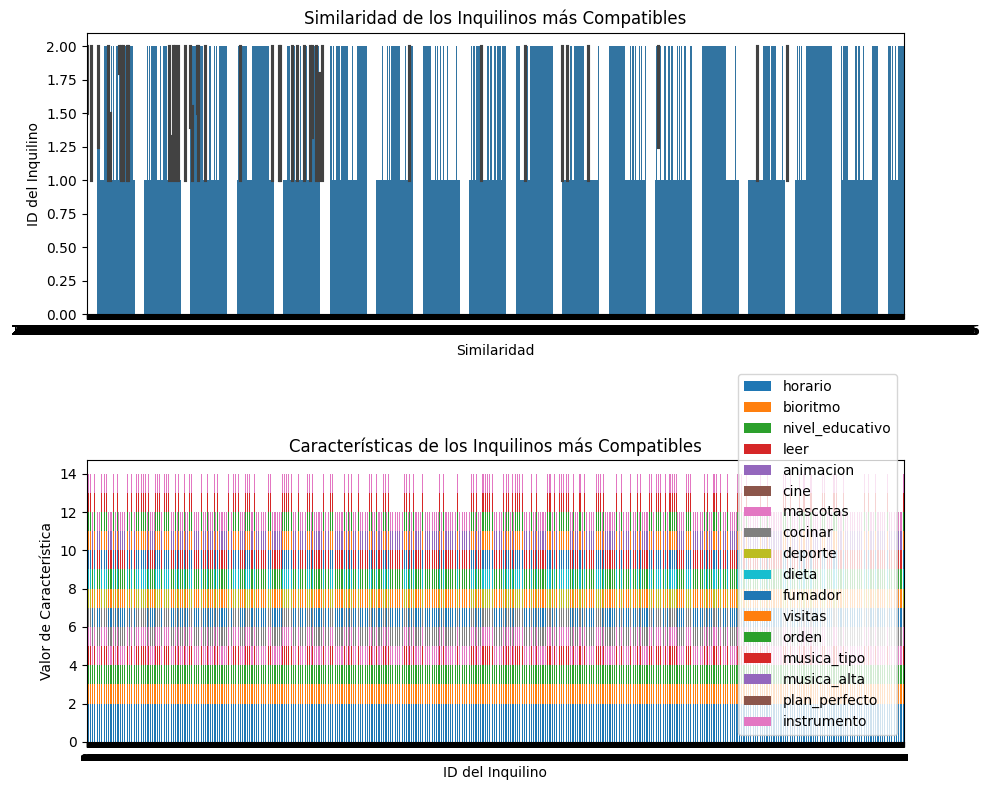

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# Cargar el conjunto de datos desde el archivo CSV
data = pd.read_csv('data//datos_transformados.csv', index_col='id_inquilino')
df = pd.DataFrame(data)

# Seleccionar las características relevantes para el clustering
features = df.copy()

# Escalar las características para que tengan media cero y varianza unitaria
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Entrenar el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

def encontrar_inquilinos_compatibles(id_inquilinos, topn=5):
    # Obtener los clusters de los inquilinos proporcionados
    clusters_provided = kmeans.predict(scaler.transform(df.loc[id_inquilinos].drop('cluster', axis=1)))

    # Filtrar el DataFrame para obtener inquilinos en el mismo cluster
    similar_cluster_df = df[df['cluster'].isin(clusters_provided)]

    # Calcular las distancias entre los inquilinos proporcionados y los inquilinos en el mismo cluster
    distances = pairwise_distances_argmin_min(
        features_scaled[df['cluster'].isin(clusters_provided)],
        scaler.transform(df.loc[id_inquilinos].drop('cluster', axis=1)),
        metric='euclidean'
    )

    # Obtener los índices de los inquilinos más similares
    most_similar_indices = similar_cluster_df.index[distances[0]]

    # Obtener las características de los inquilinos más similares
    most_similar_features = df.loc[most_similar_indices].drop('cluster', axis=1)

    return [most_similar_features, distances[1]]

# Ejemplo de uso
id_inquilinos = [1, 5]
topn = 5
resultados = encontrar_inquilinos_compatibles(id_inquilinos, topn)

# Imprimir resultados
print("Características de los inquilinos más compatibles:")
print(resultados[0])
print("\nSimilaridad de los inquilinos más compatibles:")
print(resultados[1])

# Visualizar resultados
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Gráfico de barras para mostrar la similaridad
sns.barplot(x=resultados[1], y=resultados[0].index, ax=axes[0])
axes[0].set_title('Similaridad de los Inquilinos más Compatibles')
axes[0].set_xlabel('Similaridad')
axes[0].set_ylabel('ID del Inquilino')

# Gráfico de barras para mostrar las características de los inquilinos
resultados[0].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Características de los Inquilinos más Compatibles')
axes[1].set_xlabel('ID del Inquilino')
axes[1].set_ylabel('Valor de Característica')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos desde el archivo CSV
data = pd.read_csv('data//datos_transformados.csv', index_col='id_inquilino')
df = pd.DataFrame(data)

# Seleccionar las características relevantes para el clustering
features = df.copy()

# Escalar las características para que tengan media cero y varianza unitaria
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Entrenar el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)



In [3]:

def encontrar_inquilino_compatible(id_inquilino, topn=5):
    # Obtener el cluster del inquilino proporcionado
    cluster_provided = kmeans.predict(scaler.transform(df.loc[[id_inquilino]].drop('cluster', axis=1)))

    # Filtrar el DataFrame para obtener inquilinos en el mismo cluster
    similar_cluster_df = df[df['cluster'] == cluster_provided[0]]

    # Calcular las distancias entre el inquilino proporcionado y los inquilinos en el mismo cluster
    distances = pairwise_distances_argmin_min(
        features_scaled[df['cluster'] == cluster_provided[0]],
        scaler.transform(df.loc[[id_inquilino]].drop('cluster', axis=1)),
        metric='euclidean'
    )

    # Obtener el índice del inquilino más compatible
    most_compatible_index = similar_cluster_df.index[distances[0][0]]

    # Obtener las características del inquilino más compatible
    most_compatible_features = df.loc[[most_compatible_index]].drop('cluster', axis=1)

    return most_compatible_features

In [4]:
def calcular_compatibilidad(id_inquilino_existente, id_inquilino_nuevo):
    # Obtener el cluster del inquilino existente
    cluster_existente = kmeans.predict(scaler.transform(df.loc[[id_inquilino_existente]].drop('cluster', axis=1)))

    # Obtener el cluster del inquilino nuevo
    cluster_nuevo = kmeans.predict(scaler.transform(df.loc[[id_inquilino_nuevo]].drop('cluster', axis=1)))

    if cluster_existente[0] == cluster_nuevo[0]:
        # Calcular la distancia euclidiana normalizada
        distancia = pairwise_distances_argmin_min(
            features_scaled[df['cluster'] == cluster_existente[0]],
            scaler.transform(df.loc[[id_inquilino_existente]].drop('cluster', axis=1)),
            metric='euclidean'
        )[1][0]

        # Normalizar la distancia euclidiana por la escala máxima
        max_distancia = df.drop('cluster', axis=1).max().max()
        porcentaje_compatibilidad = 100 * (1 - distancia / max_distancia)

        return porcentaje_compatibilidad
    else:
        return 0  # Inquilinos en diferentes clusters no son considerados compatibles


In [5]:

# Ejemplo de uso
id_inquilino_existente = 2433
id_inquilino_nuevo = 10300
porcentaje_compatibilidad = calcular_compatibilidad(id_inquilino_existente, id_inquilino_nuevo)

# Imprimir resultado
print(f"Porcentaje de compatibilidad entre Inquilino {id_inquilino_existente} e Inquilino {id_inquilino_nuevo}: {porcentaje_compatibilidad}%")



Porcentaje de compatibilidad entre Inquilino 2433 e Inquilino 10300: -83.13502639743244%


In [6]:
#PCA
import pandas as pd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('./data/datos_transformados.csv')

# Verificar los primeros registros para asegurarse de que los datos se hayan cargado correctamente
print(df.head())

# Aplicar PCA a los datos
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las características para PCA
features = df.columns[1:]  # Excluir la primera columna 'id_inquilino'

# Normalizar los datos
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Aplicar PCA
pca = PCA(n_components=5)  # Elegir el número de componentes principales
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2','PC3', 'PC4','PC5',])

# Concatenar los componentes principales con la columna 'id_inquilino'
finalDf = pd.concat([df[['id_inquilino']], principalDf], axis=1)

# Verificar los resultados
print(finalDf.head())


   id_inquilino  horario  bioritmo  nivel_educativo  leer  animacion  cine  \
0             1        2         1                1     1          0     0   
1             2        2         1                1     0          0     0   
2             3        2         0                2     0          0     1   
3             4        2         1                2     0          1     0   
4             5        0         1                2     1          0     0   

   mascotas  cocinar  deporte  dieta  fumador  visitas  orden  musica_tipo  \
0         1        1        1      1        1        1      1            1   
1         1        1        0      0        1        1      1            1   
2         1        1        0      0        1        0      0            0   
3         1        1        1      0        0        1      1            2   
4         0        0        0      0        0        0      1            0   

   musica_alta  plan_perfecto  instrumento  
0            0   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 1. SETUP
# Cargar datos
df = pd.read_csv('data//datos_transformados.csv', index_col='id_inquilino')

# 2. Preprocesamiento de los datos para KNN
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Entrenamiento del modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Definir el número de vecinos que deseas considerar
knn_model.fit(X_scaled, df.index)  # Utilizar los índices de los inquilinos como etiquetas

# 4. Búsqueda de inquilinos compatibles utilizando KNN
def inquilinos_compatibles_knn(id_inquilino, topn):
    # Escalar las características del inquilino dado
    id_inquilino_scaled = scaler.transform(df.loc[[id_inquilino]])
    
    # Utilizar el modelo KNN para encontrar los vecinos más cercanos
    distances, indices = knn_model.kneighbors(id_inquilino_scaled, n_neighbors=topn+1)
    
    # Obtener los índices de los vecinos más cercanos (excluyendo el inquilino dado)
    neighbors_indices = indices[0][1:]
    
    # Obtener los registros de los inquilinos similares
    registros_similares = df.iloc[neighbors_indices]
    
    # Obtener la similitud de los inquilinos similares
    similitud_series = pd.Series(data=distances[0][1:], index=neighbors_indices, name='Similitud')
    
    # Devolver los registros similares y la similitud
    return registros_similares, similitud_series

# Ahora puedes utilizar la función inquilinos_compatibles_knn para encontrar los inquilinos más similares a uno dado.
